## European Soccer

Goal: The physical characteristics of the players were examined and the general evaluation results related to the player were tried to be estimated.

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns",100)
import warnings
warnings.filterwarnings("ignore")

In [2]:
con=sqlite3.connect("database.sqlite")
players_df=pd.read_sql_query("select * from Player",con)
players_attributes_df=pd.read_sql_query("select * from Player_Attributes",con)

In [3]:
players_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [4]:
players_attributes_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
df = players_df.merge(players_attributes_df, on='player_api_id')

In [6]:
df=df.drop(["player_name","id_y","id_x","player_fifa_api_id_y","player_fifa_api_id_x"],axis=1)

In [7]:
df.head()

,player_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,1992-02-29 00:00:00,182.88,187,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,1992-02-29 00:00:00,182.88,187,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,1992-02-29 00:00:00,182.88,187,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [8]:
df.shape

(183978, 43)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_api_id        183978 non-null  int64  
 1   birthday             183978 non-null  object 
 2   height               183978 non-null  float64
 3   weight               183978 non-null  int64  
 4   date                 183978 non-null  object 
 5   overall_rating       183142 non-null  float64
 6   potential            183142 non-null  float64
 7   preferred_foot       183142 non-null  object 
 8   attacking_work_rate  180748 non-null  object 
 9   defensive_work_rate  183142 non-null  object 
 10  crossing             183142 non-null  float64
 11  finishing            183142 non-null  float64
 12  heading_accuracy     183142 non-null  float64
 13  short_passing        183142 non-null  float64
 14  volleys              181265 non-null  float64
 15  dribbling        

In [10]:
df["birthday"]=pd.to_datetime(df["birthday"])
df["birth_year"]=(df["birthday"]).dt.year
df["birth_month"]=(df["birthday"]).dt.month
df["birth_day"]=(df["birthday"]).dt.day
df.drop("birthday",axis=1,inplace=True)
df.drop("date",axis=1,inplace=True)

In [11]:
#Object
for column in df.select_dtypes(include=np.object):
    df[column].fillna(df[column].mode()[0],inplace=True)

In [12]:
#Number
for column in df.select_dtypes(include=np.number):
    df[column].fillna(df[column].mean(),inplace=True)

In [13]:
df.isnull().sum()

player_api_id          0
height                 0
weight                 0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0


In [14]:
df.corr()

,player_api_id,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,birth_year,birth_month,birth_day
player_api_id,1.000000,-0.064566,-0.159164,-0.322015,0.010978,-0.110491,-0.060317,-0.129337,-0.087218,-0.129640,0.018307,-0.097537,-0.150681,-0.138200,-0.051188,0.102932,0.095754,0.027524,-0.305809,0.021025,-0.123055,-0.140474,-0.108694,-0.232667,-0.116951,-0.210715,-0.188342,-0.106888,-0.187354,-0.164592,-0.089894,-0.086495,-0.072608,-0.071412,-0.128424,-0.238621,-0.128558,-0.124816,0.743090,-0.037545,-0.030593
height,-0.064566,1.000000,0.762675,-0.003467,-0.034083,-0.471353,-0.318702,0.110246,-0.362977,-0.333148,-0.487738,-0.448815,-0.381494,-0.294078,-0.417923,-0.518784,-0.427714,-0.613826,-0.082087,-0.664462,-0.248829,-0.002140,-0.234791,0.514783,-0.359385,0.028808,0.000541,-0.371169,-0.379885,-0.267833,0.043753,0.025180,0.010491,0.315522,0.308816,0.184779,0.308081,0.312034,-0.070963,0.005285,0.000327
weight,-0.159164,0.762675,1.000000,0.064250,-0.008133,-0.410235,-0.253737,0.095934,-0.325703,-0.259563,-0.431015,-0.385076,-0.313904,-0.266511,-0.369297,-0.459166,-0.383441,-0.551414,-0.019032,-0.549149,-0.170568,0.042721,-0.211665,0.559236,-0.287603,0.067054,-0.008890,-0.302679,-0.320355,-0.191994,0.015022,0.000208,-0.014492,0.311820,0.311121,0.204784,0.310374,0.311652,-0.171785,0.009539,0.016697
overall_rating,-0.322015,-0.003467,0.064250,1.000000,0.766757,0.357699,0.329298,0.314099,0.458361,0.359036,0.354324,0.355363,0.349592,0.435018,0.444257,0.245655,0.254841,0.238281,0.769246,0.159284,0.427996,0.257279,0.327456,0.318661,0.392382,0.323934,0.250370,0.370019,0.428234,0.393189,0.133377,0.165349,0.128021,0.027976,0.004410,0.025682,0.005709,0.005687,-0.271208,0.008990,0.004920
potential,0.010978,-0.034083,-0.008133,0.766757,1.000000,0.277755,0.286684,0.207706,0.382605,0.299272,0.338675,0.294078,0.263358,0.343716,0.401368,0.338044,0.340054,0.290976,0.580235,0.200614,0.325697,0.173641,0.260509,0.126931,0.312808,0.164815,0.165730,0.327829,0.376348,0.316414,0.055758,0.083822,0.063544,-0.011250,0.004742,0.089205,0.003406,0.003962,0.104963,-0.009660,-0.008555
crossing,-0.110491,-0.471353,-0.410235,0.357699,0.277755,1.000000,0.576860,0.369747,0.790150,0.634973,0.809061,0.785521,0.707576,0.681959,0.807302,0.599012,0.579409,0.596507,0.384514,0.516146,0.656280,0.021223,0.564360,-0.070291,0.715925,0.323599,0.305952,0.682113,0.690055,0.571473,0.235159,0.285265,0.274207,-0.603898,-0.595610,-0.349559,-0.597625,-0.601580,-0.036016,0.000236,-0.000965
finishing,-0.060317,-0.318702,-0.253737,0.329298,0.286684,0.576860,1.000000,0.373536,0.579365,0.847360,0.784659,0.687971,0.632248,0.337601,0.719709,0.528942,0.509506,0.551645,0.354473,0.392171,0.726982,0.008911,0.346688,-0.053048,0.806005,0.043714,-0.149366,0.798441,0.648410,0.720388,-0.284603,-0.229699,-0.259671,-0.479162,-0.465099,-0.287681,-0.470673,-0.473173,0.004857,0.025729,-0.010604
heading_accuracy,-0.129337,0.110246,0.095934,0.314099,0.207706,0.369747,0.373536,1.000000,0.548700,0.389552,0.400494,0.319409,0.307587,0.358634,0.551049,0.200077,0.267273,0.068851,0.295348,0.078532,0.540868,0.285275,0.477466,0.493051,0.406758,0.575705,0.452849,0.411554,0.335388,0.431336,0.461543,0.480624,0.439416,-0.665365,-0.647876,-0.391540,-0.647738,-0.651373,-0.107910,0.010301,0.006864
short_passing,-0.087218,-0.362977,-0.325703,0.458361,0.382605,0.790150,0.579365,0.548700,1.000000,0.636628,0.787994,0.728148,0.692461,0.797488,0.890042,0.503266,0.491380,0.507700,0.459289,0.459100,0.721767,0.059806,0.609956,0.092084,0.728791,0.453783,0.424288,0.677577,0.761002,0.609537,0.350171,0.415678,0.378833,-0.693313,-0.689528,-0.413317,-0.690702,-0.692926,-0.014929,-0.0

In [15]:
df.describe()

,player_api_id,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,birth_year,birth_month,birth_day
count,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000
mean,135900.617324,181.878872,168.776245,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,52.965675,49.380950,57.069880,63.388879,67.659357,68.051244,65.970910,66.103706,65.189496,61.808427,66.969045,67.038544,67.424529,53.339431,60.948046,52.009271,55.786504,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439,1986.784887,5.962767,15.477226
std,136927.840510,6.394818,15.088920,7.025124,6.577276,17.202916,18.995399,16.451399,14.161782,18.121509,17.704326,18.120685,17.791186,14.361722,15.162104,12.953794,12.541130,12.858714,9.134583,12.966512,16.098442,10.925278,13.135316,12.044820,18.325247,16.052924,19.405891,18.406330,15.032011,15.511156,21.179383,21.434839,21.438934,16.827105,15.831290,21.404183,16.062556,17.159036,4.866379,3.433887,8.852479
min,2625.000000,157.480000,117.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1967.000000,1.000000,1.000000
25%,34763.000000,177.800000,159.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,36.000000,52.000000,41.000000,36.000000,49.000000,59.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000,1983.000000,3.000000,8.000000
50%,77741.000000,182.880000,168.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,55.000000,50.000000,59.000000,66.000000,69.000000,69.000000,67.000000,67.000000,67.000000,65.000000,68.000000,69.000000,69.000000,58.000000,64.000000,56.000000,60.000000,60.000000,57.000000,50.000000,56.000000,52.000000,10.000000,11.000000,12.000000,11.000000,11.000000,1987.000000,6.000000,15.000000
75%,191080.000000,185.420000,179.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,76.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000,1990.000000,9.000000,23.000000
max,750584.000000,208.280000,243.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000,1999.000000,12.000000,31.000000


In [16]:
abs(df.corr()["overall_rating"]).sort_values(ascending=False)

overall_rating        1.000000
reactions             0.769246
potential             0.766757
short_passing         0.458361
ball_control          0.444257
long_passing          0.435018
vision                0.428234
shot_power            0.427996
penalties             0.393189
long_shots            0.392382
positioning           0.370019
volleys               0.359036
crossing              0.357699
curve                 0.355363
dribbling             0.354324
free_kick_accuracy    0.349592
finishing             0.329298
stamina               0.327456
aggression            0.323934
player_api_id         0.322015
strength              0.318661
heading_accuracy      0.314099
birth_year            0.271208
jumping               0.257279
sprint_speed          0.254841
interceptions         0.250370
acceleration          0.245655
agility               0.238281
standing_tackle       0.165349
balance               0.159284
marking               0.133377
sliding_tackle        0.128021
weight  

<AxesSubplot:>

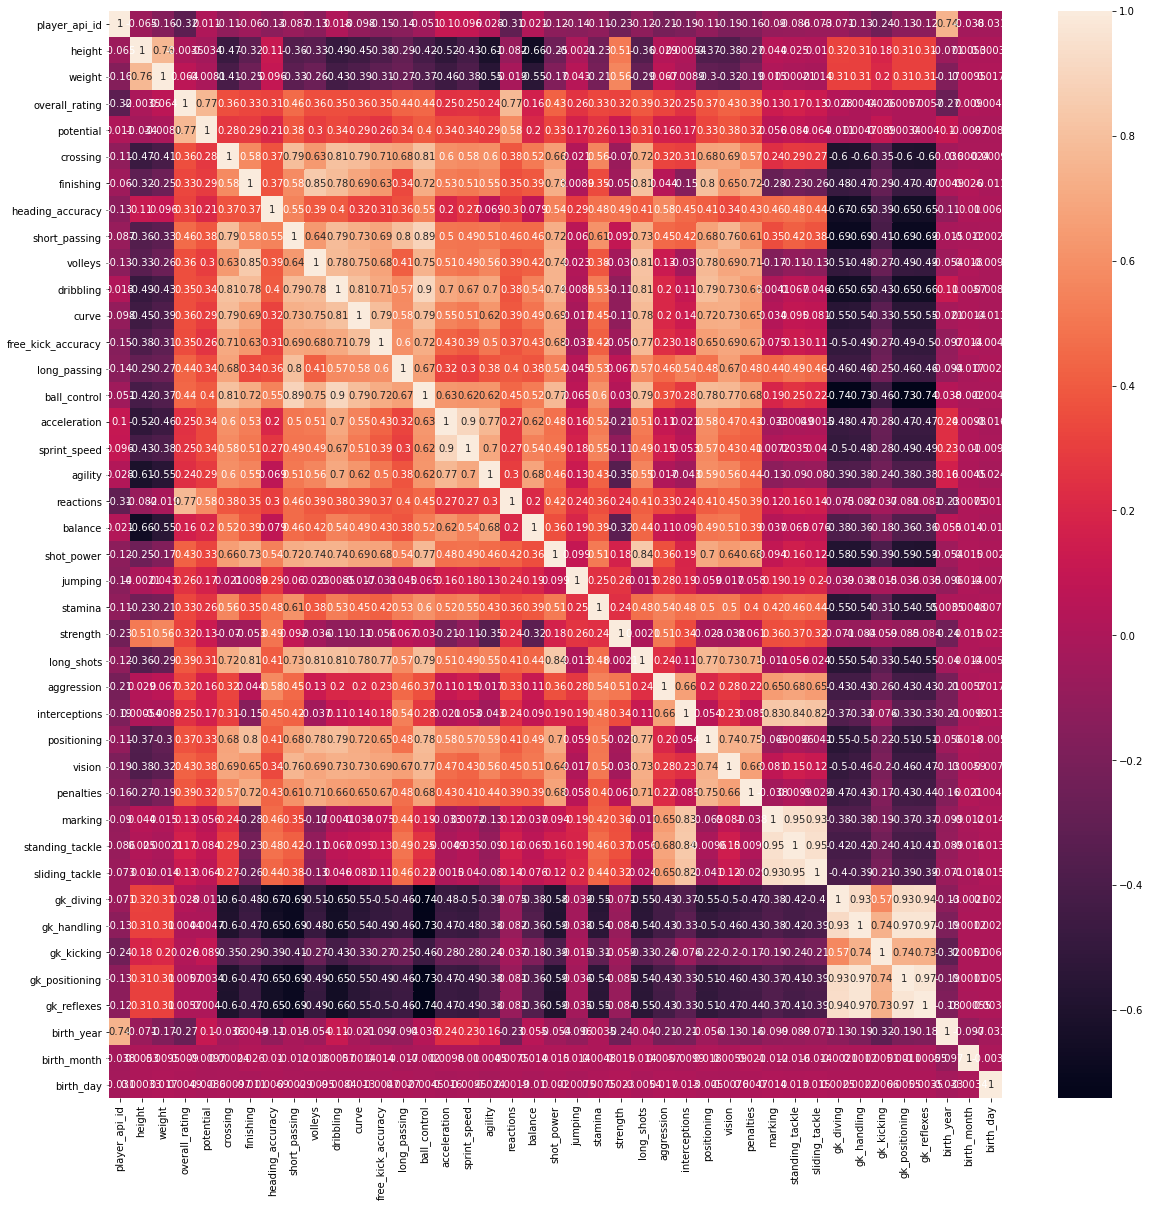

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)


In [18]:
df=pd.get_dummies(df,drop_first=True)

In [21]:
df=df.groupby("player_api_id").mean().reset_index()

In [22]:
df.head()

,player_api_id,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,birth_year,birth_month,birth_day,preferred_foot_right,attacking_work_rate_high,attacking_work_rate_le,attacking_work_rate_low,attacking_work_rate_medium,attacking_work_rate_norm,attacking_work_rate_stoc,attacking_work_rate_y,defensive_work_rate_1,defensive_work_rate_2,defensive_work_rate_3,defensive_work_rate_4,defensive_work_rate_5,defensive_work_rate_6,defensive_work_rate_7,defensive_work_rate_8,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,2625,175.26,154,60.142857,61.142857,50.142857,47.285714,46.285714,56.500000,38.000000,54.142857,50.000000,49.928571,65.571429,59.142857,66.857143,63.285714,66.428571,49.714286,66.214286,66.714286,58.714286,77.285714,55.785714,56.857143,71.285714,62.071429,50.357143,55.285714,61.928571,62.928571,63.857143,56.571429,12.428571,12.857143,19.071429,10.357143,10.428571,1981,1,27,1.000000,0.428571,0.0,0.0,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2752,187.96,174,69.380952,70.380952,36.428571,37.428571,75.333333,54.809524,20.428571,44.857143,30.428571,18.857143,59.571429,55.571429,41.619048,42.190476,43.333333,60.857143,44.571429,57.428571,56.523810,60.904762,82.238095,19.571429,80.285714,71.428571,31.428571,52.428571,35.428571,71.095238,70.666667,65.571429,11.095238,6.095238,7.095238,9.095238,15.095238,1982,12,29,1.000000,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2768,180.34,154,69.285714,70.571429,42.238095,42.761905,66.666667,64.714286,28.761905,40.238095,51.761905,20.047619,57.000000,56.380952,56.952381,58.904762,58.047619,69.809524,60.190476,38.761905,76.904762,59.285714,67.428571,19.428571,62.761905,74.714286,44.190476,57.761905,31.904762,71.666667,70.619048,79.714286,10.761905,15.904762,22.714286,15.142857,12.095238,1982,7,10,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2770,180.34,161,71.133333,73.533333,61.866667,67.666667,67.800000,72.533333,67.133333,75.066667,79.800000,68.666667,70.266667,76.733333,62.200000,59.800000,62.600000,65.933333,61.266667,68.333333,57.133333,51.000000,62.600000,73.000000,56.800000,44.933333,64.533333,71.600000,63.933333,30.200000,37.533333,25.000000,8.666667,15.666667,27.200000,16.333333,17.000000,1982,5,14,0.533333,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2790,175.26,163,70.200000,75.800000,70.000000,37.400000,55.200000,68.000000,43.000000,60.800000,67.000000,55.400000,69.800000,66.800000,70.800000,71.200000,65.000000,69.200000,67.000000,46.400000,61.000000,70.400000,71.000000,42.400000,68.400000,63.400000,60.600000,60.000000,55.400000,74.600000,74.600000,69.000000,8.000000,17.000000,59.000000,16.600000,17.400000,1974,2,15,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
x,y=df.drop(["player_api_id","overall_rating"],axis=1),df[["overall_rating"]] 

In [30]:
x.shape,y.shape

((11060, 65), (11060, 1))

In [31]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [32]:
regression_funct(x,y)

C:\Users\easan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.943236,1.429433,1.041552
KNeighborsRegressor,0.912889,1.770779,1.348534
LinearRegression,0.898093,1.915268,1.442124
Ridge,0.898089,1.915305,1.442173
ElasticNet,0.887027,2.016576,1.522121
Lasso,0.881115,2.068664,1.561126
ExtraTreeRegressor,0.795060,2.716068,2.000248


## Deep Learning Uygulanırsa?

In [33]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [36]:
x=scaler.fit_transform(x)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=60)

In [38]:
model=Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')#mse regression

In [40]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=50, verbose=1)

Epoch 1/50
70/70 [==============================] - 2s 23ms/step - loss: 1.5847 - val_loss: 2.3078
Epoch 2/50
70/70 [==============================] - 2s 23ms/step - loss: 1.4764 - val_loss: 1.3691
Epoch 3/50
70/70 [==============================] - 2s 23ms/step - loss: 1.3369 - val_loss: 1.2729
Epoch 4/50
70/70 [==============================] - 2s 27ms/step - loss: 1.4539 - val_loss: 5.5730
Epoch 5/50
70/70 [==============================] - 2s 26ms/step - loss: 2.7086 - val_loss: 1.6609
Epoch 6/50
70/70 [==============================] - 2s 30ms/step - loss: 3.5912 - val_loss: 4.7230
Epoch 7/50
70/70 [==============================] - 2s 29ms/step - loss: 5.4022 - val_loss: 1.5272
Epoch 8/50
70/70 [==============================] - 2s 28ms/step - loss: 1.5621 - val_loss: 1.1592
Epoch 9/50
70/70 [==============================] - 2s 25ms/step - loss: 1.7002 - val_loss: 2.2279
Epoch 10/50
70/70 [==============================] - 2s 28ms/step - loss: 2.0928 - val_loss: 1.3314
Epoch 11/

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               33792     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               2

<AxesSubplot:>

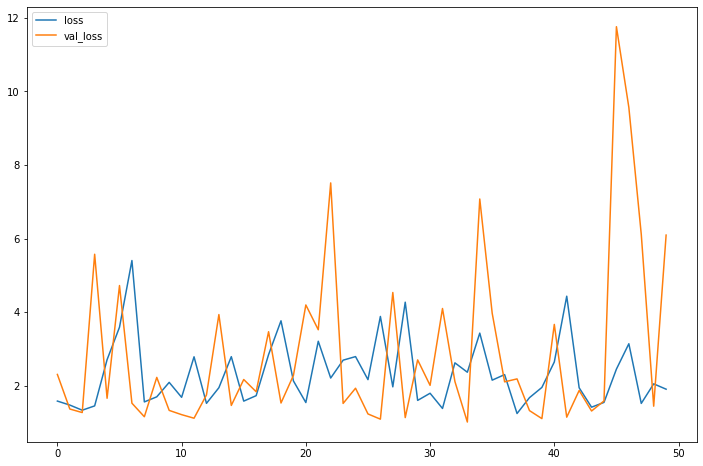

In [42]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [43]:
pred=model.predict(x_test)

In [44]:
(mean_squared_error(y_test,pred))**.5

2.4684624545637077

In [45]:
r2_score(y_test,pred) 

0.8504335013765365